In [1]:
cd /home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Data

/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Data


In [3]:
#needed to run this because following error popped up: "/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html"
!pip install --upgrade jupyter ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 kB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 41.6 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.1/386.1 kB 6.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━

In [5]:
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.analysis.msd as msd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#using .lammpstrj file from equil dir. for topology
topology = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Data/equil/kalj_T2_n360_v300_10000_1.lammpstrj"

#access production jobs output for each temperature
traj_prod_T045 = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Data/prod/kalj_T0.45_n360_v300_prod_100000000_1.unwrap.dcd"
traj_prod_T0475 = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Data/prod/kalj_T0.475_n360_v300_prod_30000000_1.unwrap.dcd"
traj_prod_T05 = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Data/prod/kalj_T0.5_n360_v300_prod_10000000_1.unwrap.dcd"
traj_prod_T055 = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Data/prod/kalj_T0.55_n360_v300_prod_3000000_1.unwrap.dcd"
traj_prod_T06 = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Data/prod/kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd"
traj_prod_T065 = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Data/prod/kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd"
traj_prod_T07 = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Data/prod/kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd"
traj_prod_T08 = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Data/prod/kalj_T0.8_n360_v300_prod_150000_1.unwrap.dcd"
traj_prod_T09 = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Data/prod/kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd"
traj_prod_T1 = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Data/prod/kalj_T1_n360_v300_prod_50000_1.unwrap.dcd"
traj_prod_T15 = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Data/prod/kalj_T1.5_n360_v300_prod_10000_1.unwrap.dcd"

# load traj with mdanalysis universe
traj_T045 = mda.Universe(topology, traj_prod_T045, topology_format='LAMMPSDUMP')
traj_T0475 = mda.Universe(topology, traj_prod_T0475, topology_format='LAMMPSDUMP')
traj_T05 = mda.Universe(topology, traj_prod_T05, topology_format='LAMMPSDUMP')
traj_T055 = mda.Universe(topology, traj_prod_T055, topology_format='LAMMPSDUMP')
traj_T06 = mda.Universe(topology, traj_prod_T06, topology_format='LAMMPSDUMP')
traj_T065 = mda.Universe(topology, traj_prod_T065, topology_format='LAMMPSDUMP')
traj_T07 = mda.Universe(topology, traj_prod_T07, topology_format='LAMMPSDUMP')
traj_T08 = mda.Universe(topology, traj_prod_T08, topology_format='LAMMPSDUMP')
traj_T09 = mda.Universe(topology, traj_prod_T09, topology_format='LAMMPSDUMP')
traj_T1 = mda.Universe(topology, traj_prod_T1, topology_format='LAMMPSDUMP')
traj_T15 = mda.Universe(topology, traj_prod_T15, topology_format="LAMMPSDUMP")

In [41]:
# RDF data preparation

#define temperature list
temperatures = [0.45, 0.475, 0.5, 0.55, 0.6, 0.65, 0.7, 0.8, 0.9, 1, 1.5]
#define trajectory list
traj_list = [traj_T045, traj_T0475, traj_T05, traj_T055, traj_T06, traj_T065, traj_T07, traj_T08, traj_T09, traj_T1, traj_T15]
#create empty list to store rdf values
rdfs = np.empty((3, len(traj_list)), dtype=object)


#compute rdf for each trajectory, type 1 and type 1 particles, type 2 and type 2, and type 1 and type 2
for traj in traj_list:
    # define selection
    sel1 = traj.select_atoms("type 1")
    sel2 = traj.select_atoms("type 2")
    # compute rdf
    rdfs[0, traj_list.index(traj)] = rdf.InterRDF(sel1, sel1, nbins=100, range=(0, 10))
    rdfs[1, traj_list.index(traj)] = rdf.InterRDF(sel2, sel2, nbins=100, range=(0, 10))
    rdfs[2, traj_list.index(traj)] = rdf.InterRDF(sel1, sel2, nbins=100, range=(0, 10))
    # run rdf
    rdfs[0, traj_list.index(traj)].run()
    rdfs[1, traj_list.index(traj)].run()
    rdfs[2, traj_list.index(traj)].run()

# Print RDF data
for i, temperature in enumerate(temperatures):
    print(f"Temperature: {temperature}")
    print("Type 1 and Type 1 RDF:")
    print("Bins:", rdfs[0, i].bins)
    print("RDF:", rdfs[0, i].rdf)
    print("\nType 2 and Type 2 RDF:")
    print("Bins:", rdfs[1, i].bins)
    print("RDF:", rdfs[1, i].rdf)
    print("\nType 1 and Type 2 RDF:")
    print("Bins:", rdfs[2, i].bins)
    print("RDF:", rdfs[2, i].rdf)
    print("\n")

Temperature: 0.45
Type 1 and Type 1 RDF:
Bins: [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95 3.05 3.15 3.25 3.35 3.45 3.55 3.65 3.75 3.85 3.95 4.05 4.15
 4.25 4.35 4.45 4.55 4.65 4.75 4.85 4.95 5.05 5.15 5.25 5.35 5.45 5.55
 5.65 5.75 5.85 5.95 6.05 6.15 6.25 6.35 6.45 6.55 6.65 6.75 6.85 6.95
 7.05 7.15 7.25 7.35 7.45 7.55 7.65 7.75 7.85 7.95 8.05 8.15 8.25 8.35
 8.45 8.55 8.65 8.75 8.85 8.95 9.05 9.15 9.25 9.35 9.45 9.55 9.65 9.75
 9.85 9.95]
RDF: [2.48679625e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.87957195e-01 3.53228968e+00 2.39017044e+00
 8.55683958e-01 4.32297880e-01 3.77136728e-01 5.20251622e-01
 8.55925093e-01 1.12604039e+00 1.24210109e+00 1.20477577e+00
 1.24420747e+00 1.17772977e+00 8.72503667e-01 7.09291460e-01
 7.68087299e-01 9.35634206e-01 1.09804209e+00 1.16316533e+00
 1.12330987e

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


Plot saved to PDF successfully.


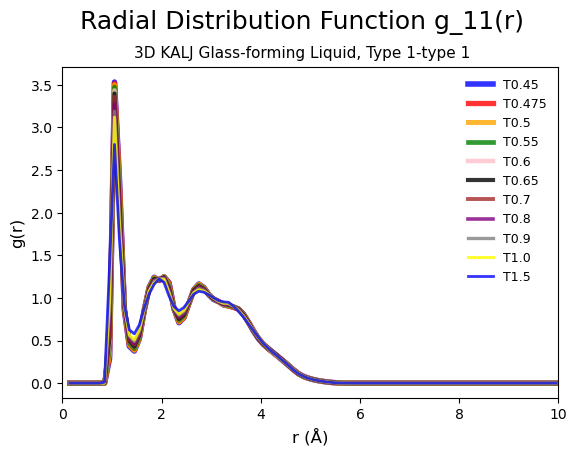

In [31]:
fig = plt.figure(1)

# set colorblind-friendly palette
colors = ['blue', 'red', 'orange', 'green', 'pink', 'black', 'brown', 'purple', 'gray', 'yellow', 'blue']
# set 11 line widths, ranging from 4 to 2
linewidths = np.linspace(4, 2, 11)
# temperature list
temps = ['0.45', '0.475', '0.5', '0.55', '0.6', '0.65', '0.7', '0.8', '0.9', '1.0', '1.5']

# plot RDFs
for j in range(len(temps)):
    plt.plot(rdfs[0, j].bins[1:], rdfs[0, j].rdf[1:], color=colors[j], linewidth=linewidths[j], label='T'+temps[j], alpha=0.8)

plt.xlabel('r (Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.xlim(0, 10)

# two lines of title
plt.text(x=0.5, y=0.88, s="Radial Distribution Function g_11(r)", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "3D KALJ Glass-forming Liquid, Type 1-type 1", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
directory = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Figures/"
fname = "Week9Fig.1-Radial Distribution Function for g_11.pdf"
full_dir = directory + fname

try:
    plt.savefig(full_dir, bbox_inches='tight')  # Adjust bounding box to fit the plot
    print("Plot saved to PDF successfully.")
except Exception as e:
    print(f"Error saving plot: {e}")
    print("File not saved")

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


Plot saved to PDF successfully.


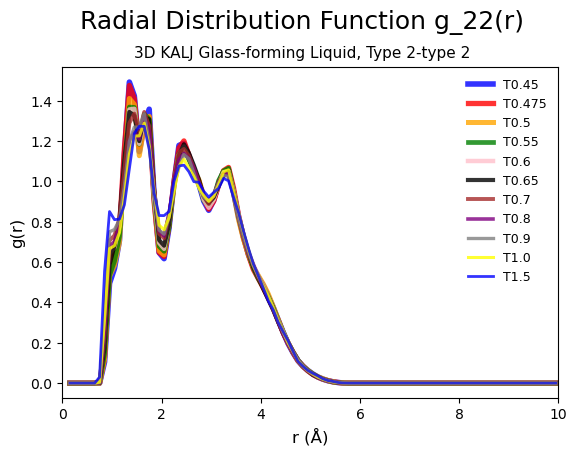

In [34]:
fig = plt.figure(2)

# set colorblind-friendly palette
colors = ['blue', 'red', 'orange', 'green', 'pink', 'black', 'brown', 'purple', 'gray', 'yellow', 'blue']
# set 11 line widths, ranging from 4 to 2
linewidths = np.linspace(4, 2, 11)
# temperature list
temps = ['0.45', '0.475', '0.5', '0.55', '0.6', '0.65', '0.7', '0.8', '0.9', '1.0', '1.5']

# plot RDFs
for j in range(len(temps)):
    plt.plot(rdfs[1, j].bins[1:], rdfs[1, j].rdf[1:], color=colors[j], linewidth=linewidths[j], label='T'+temps[j], alpha=0.8)

plt.xlabel('r (Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.xlim(0, 10)

# two lines of title
plt.text(x=0.5, y=0.88, s="Radial Distribution Function g_22(r)", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "3D KALJ Glass-forming Liquid, Type 2-type 2", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
directory = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Figures/"
fname = "Week9Fig.2-Radial Distribution Function for g_22.pdf"
full_dir = directory + fname

try:
    plt.savefig(full_dir, bbox_inches='tight')  # Adjust bounding box to fit the plot
    print("Plot saved to PDF successfully.")
except Exception as e:
    print(f"Error saving plot: {e}")
    print("File not saved")

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


Plot saved to PDF successfully.


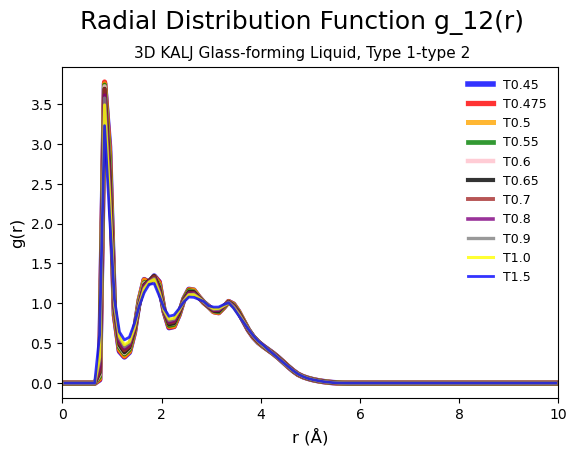

In [35]:
fig = plt.figure(3)

# set colorblind-friendly palette
colors = ['blue', 'red', 'orange', 'green', 'pink', 'black', 'brown', 'purple', 'gray', 'yellow', 'blue']
# set 11 line widths, ranging from 4 to 2
linewidths = np.linspace(4, 2, 11)
# temperature list
temps = ['0.45', '0.475', '0.5', '0.55', '0.6', '0.65', '0.7', '0.8', '0.9', '1.0', '1.5']

# plot RDFs
for j in range(len(temps)):
    plt.plot(rdfs[2, j].bins, rdfs[2, j].rdf, color=colors[j], linewidth=linewidths[j], label='T'+temps[j], alpha=0.8)

plt.xlabel('r (Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.xlim(0, 10)

# two lines of title
plt.text(x=0.5, y=0.88, s="Radial Distribution Function g_12(r)", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "3D KALJ Glass-forming Liquid, Type 1-type 2", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
directory = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Figures/"
fname = "Week9Fig.3-Radial Distribution Function for g_12.pdf"
full_dir = directory + fname

try:
    plt.savefig(full_dir, bbox_inches='tight')  # Adjust bounding box to fit the plot
    print("Plot saved to PDF successfully.")
except Exception as e:
    print(f"Error saving plot: {e}")
    print("File not saved")

In [45]:
# MSD data preparation

#define trajectory list
traj_list = [traj_T045, traj_T0475, traj_T05, traj_T055, traj_T06, traj_T065, traj_T07, traj_T08, traj_T09, traj_T1, traj_T15]
#create empty list to store rdf values
msds = np.empty(len(temps), dtype=object)
#select atom type 1
sel = 'type 1'

# calculate MSDs
for traj in traj_list:
    # compute msd
    msds[traj_list.index(traj)] = msd.EinsteinMSD(traj, select=sel, msd_type='xyz', fft=False)
    # run
    msds[traj_list.index(traj)].run()

# Print MSD data
for i, traj in enumerate(traj_list):
    print(f"Trajectory: {i+1}")
    print("Mean Squared Displacement:")
    print("Times:", msds[i].times)
    print("MSD:", msds[i].results)
    print("\n")

Trajectory: 1
Mean Squared Displacement:
Times: [   0.            7.33323156   14.66646313   21.99969469   29.33292625
   36.66615782   43.99938938   51.33262095   58.66585251   65.99908407
   73.33231564   80.6655472    87.99877876   95.33201033  102.66524189
  109.99847346  117.33170502  124.66493658  131.99816815  139.33139971
  146.66463127  153.99786284  161.3310944   168.66432597  175.99755753
  183.33078909  190.66402066  197.99725222  205.33048378  212.66371535
  219.99694691  227.33017848  234.66341004  241.9966416   249.32987317
  256.66310473  263.99633629  271.32956786  278.66279942  285.99603099
  293.32926255  300.66249411  307.99572568  315.32895724  322.6621888
  329.99542037  337.32865193  344.6618835   351.99511506  359.32834662
  366.66157819  373.99480975  381.32804131  388.66127288  395.99450444
  403.32773601  410.66096757  417.99419913  425.3274307   432.66066226
  439.99389382  447.32712539  454.66035695  461.99358852  469.32682008
  476.66005164  483.99328321  

Plot saved to PDF successfully.


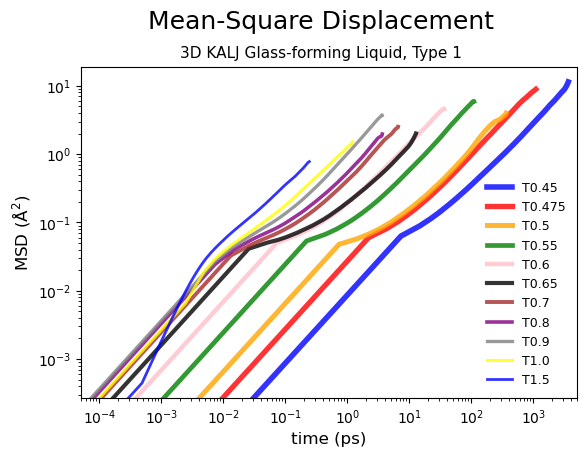

In [66]:
fig = plt.figure(3)

# set colorblind-friendly palette
colors = ['blue', 'red', 'orange', 'green', 'pink', 'black', 'brown', 'purple', 'gray', 'yellow', 'blue']
# set 11 line widths, ranging from 4 to 2
linewidths = np.linspace(4, 2, 11)
# temperature list
temps = ['0.45', '0.475', '0.5', '0.55', '0.6', '0.65', '0.7', '0.8', '0.9', '1.0', '1.5']

# plot RDFs
for j in range(len(temps)):
    plt.loglog(msds[j].times, msds[j].results.timeseries, color=colors[j], linewidth=linewidths[j], label='T'+temps[j], alpha=0.8)

plt.xlabel('time (ps)', fontsize=12)
plt.ylabel('MSD (Å$^2$)', fontsize=12)
plt.legend(loc='lower right', fontsize=9, frameon=False)
plt.xlim(0.00005, 5000)

# two lines of title
plt.text(x=0.5, y=0.88, s="Mean-Square Displacement", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "3D KALJ Glass-forming Liquid, Type 1", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
directory = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Figures/"
fname = "Week9Fig.4-Mean-Square Displacements for Type 1.pdf"
full_dir = directory + fname

try:
    plt.savefig(full_dir, bbox_inches='tight')  # Adjust bounding box to fit the plot
    print("Plot saved to PDF successfully.")
except Exception as e:
    print(f"Error saving plot: {e}")
    print("File not saved")

In [48]:
# data preparation
#Find the time where MSD = 1 at each temperature. This is the time where the particle would diffuse 1 diameter on average. Make a plot of this time vs $1/T$. This should also be a log-log plot.

# define empty list to store diffusion times
diffusion_times = []
# loop over all temperatures
for j in range(len(temps)):
    # try find the index of the first time where MSD > 1
    try :
        index = np.where(msds[j].results.timeseries > 1)[0][0]
    # if not found, set index to -1
    except IndexError:
        index = -1
    # append the diffusion time to the list
    diffusion_times.append(msds[j].times[index])
    j += 1

Plot saved to PDF successfully.


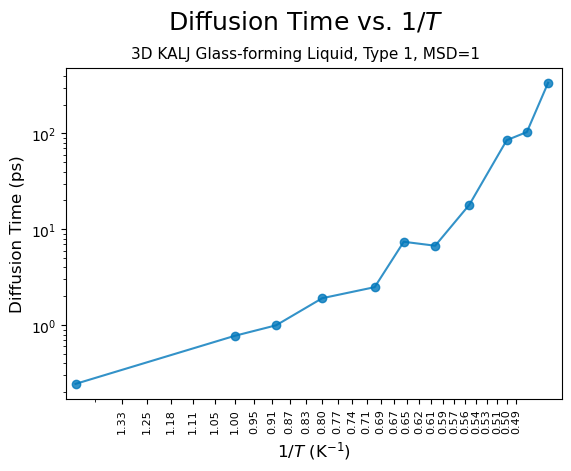

In [69]:
fig = plt.figure(5)

# Plot diffusion times vs 1/T
plt.loglog(1/np.array(temps, dtype=float), diffusion_times,'o', color='#0077BB', alpha=0.8)
plt.loglog(1/np.array(temps, dtype=float), diffusion_times, color='#0077BB', alpha=0.8)
plt.xlabel(r'$1/T$ (K$^{-1}$)', fontsize=12)
plt.ylabel('Diffusion Time (ps)', fontsize=12)
plt.xlim(0.65, 2.3)

# Add more ticks and labels to x-axis
x_ticks_major = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3]
x_tick_labels_major = [f'{1/x:.2f}' for x in x_ticks_major]  # Convert ticks back to temperature values

# Minor ticks
x_ticks_minor = np.arange(0.75, 2.1, 0.05)

plt.minorticks_on()
plt.xticks(x_ticks_major, x_tick_labels_major)
plt.xticks(x_ticks_minor, x_tick_labels_minor, rotation=90, fontsize=8)  # Remove minor tick labels

# Increase space between minor ticks
plt.tick_params(axis='x', which='minor', pad=10)  # Adjust the pad parameter to increase the spacing

# Two lines of title
plt.text(x=0.5, y=0.88, s="Diffusion Time vs. "+r"$1/T$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "3D KALJ Glass-forming Liquid, Type 1, MSD=1", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# Save figure as PDF in ../Figures
directory = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week9/Figures/"
fname = "Week9Fig.5-Diffusion Time for Type 1.pdf"
full_dir = directory + fname

try:
    plt.savefig(full_dir, bbox_inches='tight')  # Adjust bounding box to fit the plot
    print("Plot saved to PDF successfully.")
except Exception as e:
    print(f"Error saving plot: {e}")
    print("File not saved")